Preprocess modules
=========

Jinbo Wang

Jinbo.Wang@jpl.nasa.gov

Created on 9/5/2021

updated on July 20, 2022
Use the new sampling data. 



In [29]:
import numpy as np
import pylab as plt
import xarray as xr
import sys
sys.path.append('../src/')
import odysea_class as ody

In [70]:
orbit=ody.wacmLatLon()
lats=np.arange(10,80,2)
t0=np.datetime64('2019-04-02')
t1=t0+np.timedelta64(200,'D')
timing=orbit.getSamplingTimes(lats,np.ones_like(lats),t0,t1)

Text(0.5, 0, 'latitude')

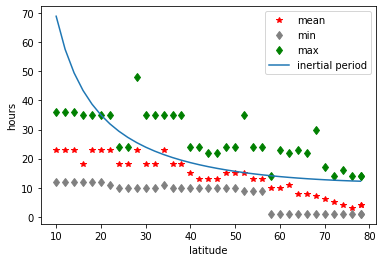

In [74]:
for tt,lat in zip(timing,lats):
    tt=np.diff(np.array(tt)-t0)/1e9/3600.0
    plt.plot(lat,tt.mean(),'r*',)
    plt.plot(lat,tt.min(),'d',color='gray',)
    plt.plot(lat,tt.max(),'d',color='green',)
plt.plot(lat,tt.mean(),'r*',label='mean')
plt.plot(lat,tt.min(),'d',color='gray',label='min')
plt.plot(lat,tt.max(),'d',color='green',label='max')
    
periods=np.abs(2*np.pi/(2*7.292e-5*np.sin(np.pi*lats/180)) / 3600)
plt.plot(lats,periods,label='inertial period')
plt.legend()
plt.ylabel('hours')
plt.xlabel('latitude')

In [ ]:
lons=np.arange(0,360,20)
timing=orbit.getSamplingTimes(lats,np.ones_like(lats),t0,t1)
for tt,lon in zip(timing,lons):
    tt=np.diff(np.array(tt)-t0)/1e9/3600.0
    plt.plot(lon,tt.mean(),'r*',)
    plt.plot(lon,tt.min(),'d',color='gray',)
    plt.plot(lon,tt.max(),'d',color='green',)
plt.plot(lon,tt.mean(),'r*',label='mean')
plt.plot(lon,tt.min(),'d',color='gray',label='min')
plt.plot(lon,tt.max(),'d',color='green',label='max')
    
periods=np.abs(2*np.pi/(2*7.292e-5*np.sin(np.pi*lats/180)) / 3600)
plt.plot(lats,periods,label='inertial period')
plt.legend()
plt.ylabel('hours')
plt.xlabel('latitude')

In [ ]:
lat=np.load('../data/wacm.Alex/lat_centers.npy')
period=np.load('../data/wacm.Alex/average_sampling_by_lat.npy')
plt.plot(lat,period,label='700_1800',lw=2)
dout=np.c_[lat.reshape(-1,1),period.reshape(-1,1)]
np.savetxt('wacm_sampling_period_orbit_700_1800.txt',dout,fmt='%6.3f')


lat=np.load('../data/wacm.Alex/lat_centers_1000km_swath.npy')
period=np.load('../data/wacm.Alex/average_sampling_by_lat_1000km_swath.npy')
plt.plot(lat,period,label='500_1000',lw=2)
dout=np.c_[lat.reshape(-1,1),period.reshape(-1,1)]
np.savetxt('wacm_sampling_period_orbit_500_1000.txt',dout,fmt='%6.3f')

periods=np.abs(2*np.pi/(2*7.292e-5*np.sin(np.pi*lat/180)) / 3600)

periods[periods>45]=np.nan
plt.plot(lat,periods, label='Inertial period',lw=2)

plt.xlabel('Latitude')
plt.ylabel('Hours')

plt.yticks(np.arange(4)*12)
plt.xlim(-77,77)
plt.legend()

plt.grid(True)
plt.savefig('../figures/sampling_periods.pdf')